# Data Analytics 2

Name - Chinmay Ambekar
Roll NO. - 31403

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv")

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df = data.copy()
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Convert Categorical data into Numerical Data 

In [8]:
df['Gender'].replace(['Male','Female'],[0,1], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


# Data Visualization

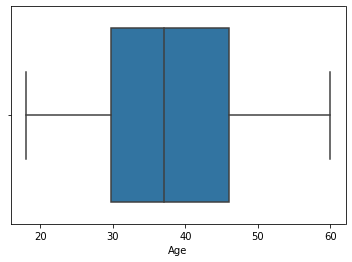

In [10]:
sns.boxplot(x=df['Age'])

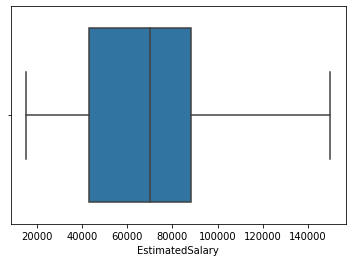

In [11]:
sns.boxplot(x=df['EstimatedSalary'])

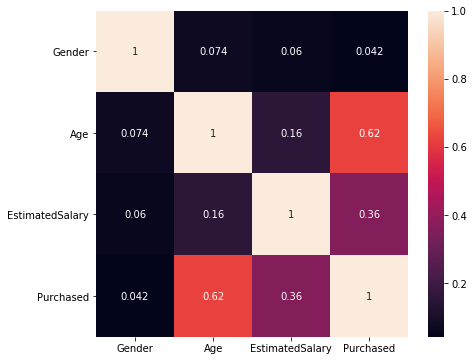

In [12]:
plt.figure(figsize=(7,6))

corr = df[df.columns[1:]].corr()

sns.heatmap(corr, annot = True)

# Splitting Dataset into Train and Test

In [19]:
X = df.iloc[:,range(1,4)].values
y = df.iloc[:,4].values
# print(X)
# print(y)

[[    0    19 19000]
 [    0    35 20000]
 [    1    26 43000]
 ...
 [    1    50 20000]
 [    0    36 33000]
 [    1    49 36000]]


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Data Normalization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression model

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = classifier.predict(X_test)

# Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 7 25]]


In [21]:
Accuracy=(cm[0][0]+cm[1][1])/(sum(cm[0])+sum(cm[1])) # (TP+TN)/total
Accuracy

0.9

In [22]:
error_rate = (cm[0][1]+cm[1][0])/(sum(cm[0])+sum(cm[1])) # (FN+FP)/total
error_rate

0.1

In [23]:
precision = (cm[0][0])/(cm[0][0]+cm[1][0]) # TP/(TP+FP)
precision

0.9027777777777778

In [24]:
recall = (cm[0][0])/(cm[0][0]+cm[0][1]) # TP/(TP+FN)
recall

0.9558823529411765

# Coefficient and Intercept of Logistic Regression line

In [25]:
classifier.coef_

array([[-0.09452625,  2.09587724,  1.11776434]])

In [26]:
classifier.intercept_

array([-0.96121116])